### Load Model and Inference data

In [1]:
import pandas as pd
import pickle
import numpy as np
import os

In [2]:
##Load Inference data

#df_inference = pd.read_csv('output_folder/Inference_data.csv')
file_path = os.path.join("../output_folder", "Inference_data.csv")
df_inference = pd.read_csv(file_path)
print(df_inference.shape)
print('')
df_inference.head()

(500, 32)



,Unnamed: 0,NPI_ID,HCP_ID,Age,Number_of_Rx,Rx_last_1_Month,Rx_last_3_Month,Rx_last_6_Month,Rx_last_12_Month,Claims_last_1_Month,...,Promotional_medscape_last_3_month,Promotional_medscape_last_6_month,F2F_visit,F2F_visit_last_1_month,F2F_visit_last_3_month,VRC_visit_last_3_month,VRC_visit_last_6_month,VRC_visit_last_12_month,HCO_Affiliation_Type_Contract,HCO_Affiliation_Type_Referral
0,4637,4982891,HCP_4638,82,133,184,302,330,378,264,...,23,46,2,3,5,5,9,10,False,True
1,3387,2838371,HCP_3388,28,338,425,773,1544,2153,204,...,14,17,1,2,3,4,6,11,True,False
2,2730,4488773,HCP_2731,38,1100,1202,2180,3876,4878,264,...,20,23,2,3,4,5,7,8,False,False
3,593,8623941,HCP_594,84,866,1005,1280,1989,3550,56,...,17,33,2,4,5,4,6,9,True,False
4,2916,8596687,HCP_2917,62,908,1576,2036,2167,4210,103,...,26,46,2,4,7,4,8,10,False,True


In [3]:
df_inference.drop(['Unnamed: 0'], axis=1, inplace = True)
df_inference.head()

,NPI_ID,HCP_ID,Age,Number_of_Rx,Rx_last_1_Month,Rx_last_3_Month,Rx_last_6_Month,Rx_last_12_Month,Claims_last_1_Month,Claims_last_3_Month,...,Promotional_medscape_last_3_month,Promotional_medscape_last_6_month,F2F_visit,F2F_visit_last_1_month,F2F_visit_last_3_month,VRC_visit_last_3_month,VRC_visit_last_6_month,VRC_visit_last_12_month,HCO_Affiliation_Type_Contract,HCO_Affiliation_Type_Referral
0,4982891,HCP_4638,82,133,184,302,330,378,264,444,...,23,46,2,3,5,5,9,10,False,True
1,2838371,HCP_3388,28,338,425,773,1544,2153,204,328,...,14,17,1,2,3,4,6,11,True,False
2,4488773,HCP_2731,38,1100,1202,2180,3876,4878,264,486,...,20,23,2,3,4,5,7,8,False,False
3,8623941,HCP_594,84,866,1005,1280,1989,3550,56,102,...,17,33,2,4,5,4,6,9,True,False
4,8596687,HCP_2917,62,908,1576,2036,2167,4210,103,179,...,26,46,2,4,7,4,8,10,False,True


In [4]:
# Load the model

model_path = os.path.join("../output_folder", "model/physician_conversion.pkl")

with open(model_path, "rb") as f:
    conversion_classifer = pickle.load(f)

In [5]:
#id col not to be considered while training
drop_id_col_list = ['NPI_ID', 'HCP_ID']

In [6]:
df_inference['Prediction'] = conversion_classifer.predict(df_inference.drop(drop_id_col_list, axis=1))

c:\Program Files\Python39\lib\site-packages\xgboost\data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Program Files\Python39\lib\site-packages\xgboost\data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
c:\Program Files\Python39\lib\site-packages\xgboost\data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
c:\Program Files\Python39\lib\site-packages\xgboost\data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


In [7]:
df_inference['Prediction'].value_counts()

Prediction
0    381
1    119
Name: count, dtype: int64

### Model Explainibility

In [8]:
#Load Validation Set

df_validation = pd.read_csv('../output_folder/Validation_data.csv')
print(df_validation.shape)
print('')
df_validation.head()

(900, 33)



,Unnamed: 0,NPI_ID,HCP_ID,Age,Number_of_Rx,Rx_last_1_Month,Rx_last_3_Month,Rx_last_6_Month,Rx_last_12_Month,Claims_last_1_Month,...,Promotional_medscape_last_6_month,F2F_visit,F2F_visit_last_1_month,F2F_visit_last_3_month,VRC_visit_last_3_month,VRC_visit_last_6_month,VRC_visit_last_12_month,HCO_Affiliation_Type_Contract,HCO_Affiliation_Type_Referral,TARGET
0,2584,2136011,HCP_2585,56,248,274,409,723,1261,309,...,35,1,2,3,5,9,17,False,False,0
1,1073,7504404,HCP_1074,38,1100,1833,3432,5959,9538,76,...,42,1,2,3,5,8,13,False,False,0
2,1369,5944892,HCP_1370,70,1020,1701,2620,4131,6094,333,...,25,2,3,4,6,7,12,False,False,0
3,1672,3563201,HCP_1673,77,772,1499,2320,2865,5133,223,...,13,2,3,4,4,6,8,False,True,0
4,3637,1512806,HCP_3638,66,698,1364,2074,3945,6197,289,...,40,1,2,4,4,6,7,False,False,0


In [9]:
df_validation.drop(['Unnamed: 0'], axis=1, inplace = True)
df_validation.head()

,NPI_ID,HCP_ID,Age,Number_of_Rx,Rx_last_1_Month,Rx_last_3_Month,Rx_last_6_Month,Rx_last_12_Month,Claims_last_1_Month,Claims_last_3_Month,...,Promotional_medscape_last_6_month,F2F_visit,F2F_visit_last_1_month,F2F_visit_last_3_month,VRC_visit_last_3_month,VRC_visit_last_6_month,VRC_visit_last_12_month,HCO_Affiliation_Type_Contract,HCO_Affiliation_Type_Referral,TARGET
0,2136011,HCP_2585,56,248,274,409,723,1261,309,449,...,35,1,2,3,5,9,17,False,False,0
1,7504404,HCP_1074,38,1100,1833,3432,5959,9538,76,77,...,42,1,2,3,5,8,13,False,False,0
2,5944892,HCP_1370,70,1020,1701,2620,4131,6094,333,582,...,25,2,3,4,6,7,12,False,False,0
3,3563201,HCP_1673,77,772,1499,2320,2865,5133,223,306,...,13,2,3,4,4,6,8,False,True,0
4,1512806,HCP_3638,66,698,1364,2074,3945,6197,289,292,...,40,1,2,4,4,6,7,False,False,0


In [10]:
X_val = df_validation.drop(['NPI_ID', 'HCP_ID','TARGET'], axis=1)
X_val.head()

,Age,Number_of_Rx,Rx_last_1_Month,Rx_last_3_Month,Rx_last_6_Month,Rx_last_12_Month,Claims_last_1_Month,Claims_last_3_Month,Procedures_chemo_last_1_month,Procedures_chemo_last_3_month,...,Promotional_medscape_last_3_month,Promotional_medscape_last_6_month,F2F_visit,F2F_visit_last_1_month,F2F_visit_last_3_month,VRC_visit_last_3_month,VRC_visit_last_6_month,VRC_visit_last_12_month,HCO_Affiliation_Type_Contract,HCO_Affiliation_Type_Referral
0,56,248,274,409,723,1261,309,449,65,97,...,19,35,1,2,3,5,9,17,False,False
1,38,1100,1833,3432,5959,9538,76,77,61,85,...,21,42,1,2,3,5,8,13,False,False
2,70,1020,1701,2620,4131,6094,333,582,51,53,...,16,25,2,3,4,6,7,12,False,False
3,77,772,1499,2320,2865,5133,223,306,47,70,...,11,13,2,3,4,4,6,8,False,True
4,66,698,1364,2074,3945,6197,289,292,37,59,...,30,40,1,2,4,4,6,7,False,False


In [11]:
X_val = X_val.astype(float)

print(X_val)

      Age  Number_of_Rx  Rx_last_1_Month  Rx_last_3_Month  Rx_last_6_Month  \
0    56.0         248.0            274.0            409.0            723.0   
1    38.0        1100.0           1833.0           3432.0           5959.0   
2    70.0        1020.0           1701.0           2620.0           4131.0   
3    77.0         772.0           1499.0           2320.0           2865.0   
4    66.0         698.0           1364.0           2074.0           3945.0   
..    ...           ...              ...              ...              ...   
895  57.0         109.0            179.0            338.0            568.0   
896  37.0         352.0            569.0            838.0           1503.0   
897  78.0        1046.0           1326.0           2640.0           4723.0   
898  83.0         859.0            887.0           1013.0           1869.0   
899  38.0         893.0            997.0           1051.0           1769.0   

     Rx_last_12_Month  Claims_last_1_Month  Claims_last_3_Month

In [12]:
X_val.columns

Index(['Age', 'Number_of_Rx', 'Rx_last_1_Month', 'Rx_last_3_Month',
       'Rx_last_6_Month', 'Rx_last_12_Month', 'Claims_last_1_Month',
       'Claims_last_3_Month', 'Procedures_chemo_last_1_month',
       'Procedures_chemo_last_3_month', 'Procedures_chemo_last_6_month',
       'Procedures_chemo_last_12_month', 'Procedures_radio_last_1_month',
       'Procedures_Immuno_last_6_month', 'Procedures_Immuno_last_12_month',
       'Procedures_Biopsy_last_3_month', 'Procedures_Biopsy_last_6_month',
       'Procedures_Biopsy_last_12_month', 'Promotional_medscape_last_1_month',
       'Promotional_medscape_last_3_month',
       'Promotional_medscape_last_6_month', 'F2F_visit',
       'F2F_visit_last_1_month', 'F2F_visit_last_3_month',
       'VRC_visit_last_3_month', 'VRC_visit_last_6_month',
       'VRC_visit_last_12_month', 'HCO_Affiliation_Type_Contract',
       'HCO_Affiliation_Type_Referral'],
      dtype='object')

In [13]:
X_test = df_inference.drop(['NPI_ID', 'HCP_ID','Prediction'], axis=1)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


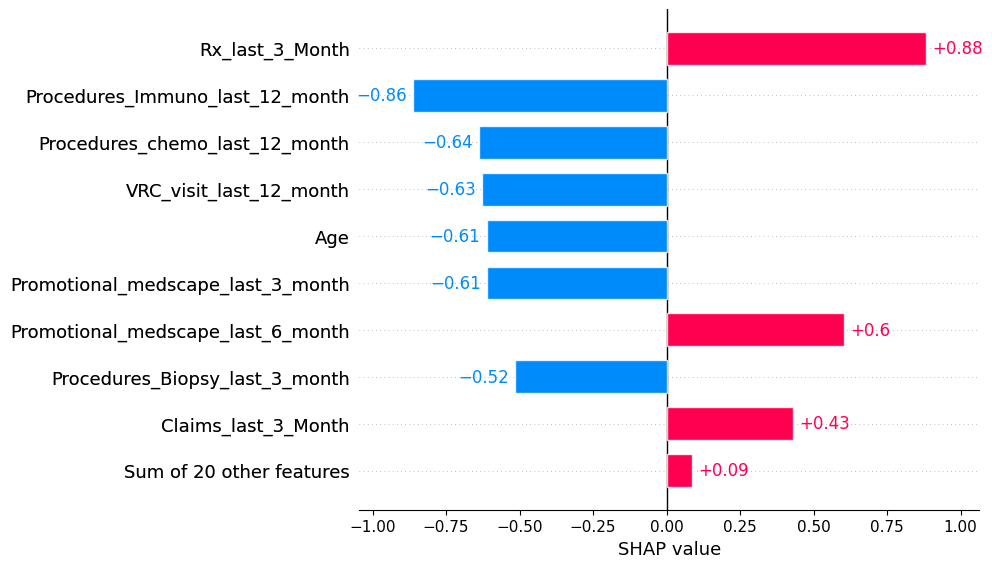

In [14]:
import shap

# Create a SHAP explanation
explainer = shap.Explainer(conversion_classifer, X_val)
shap_values = explainer(X_test)

# Visualize the SHAP explanation
shap.plots.bar(shap_values[1])

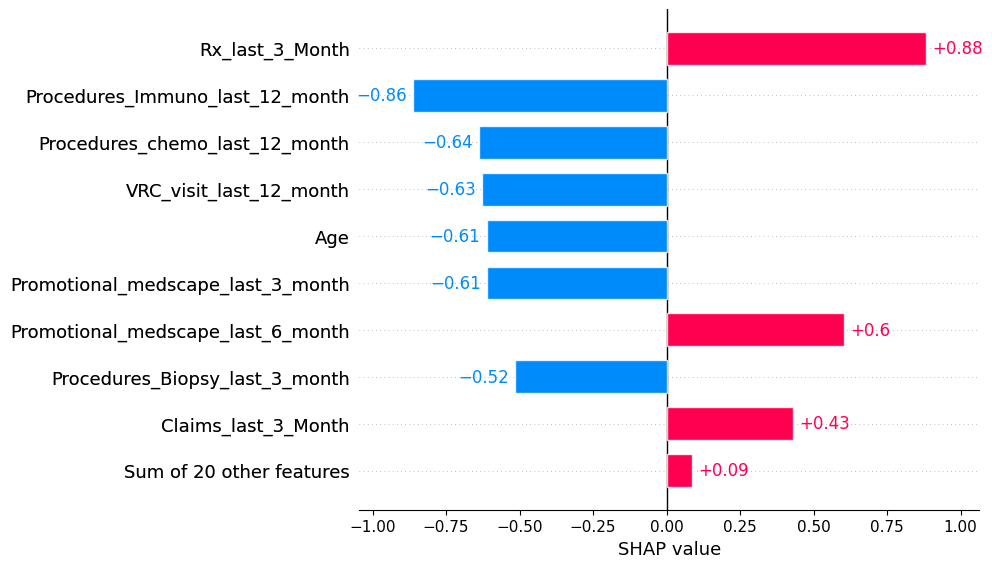

In [15]:
# Visualize the SHAP explanation
shap.plots.bar(shap_values[1])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


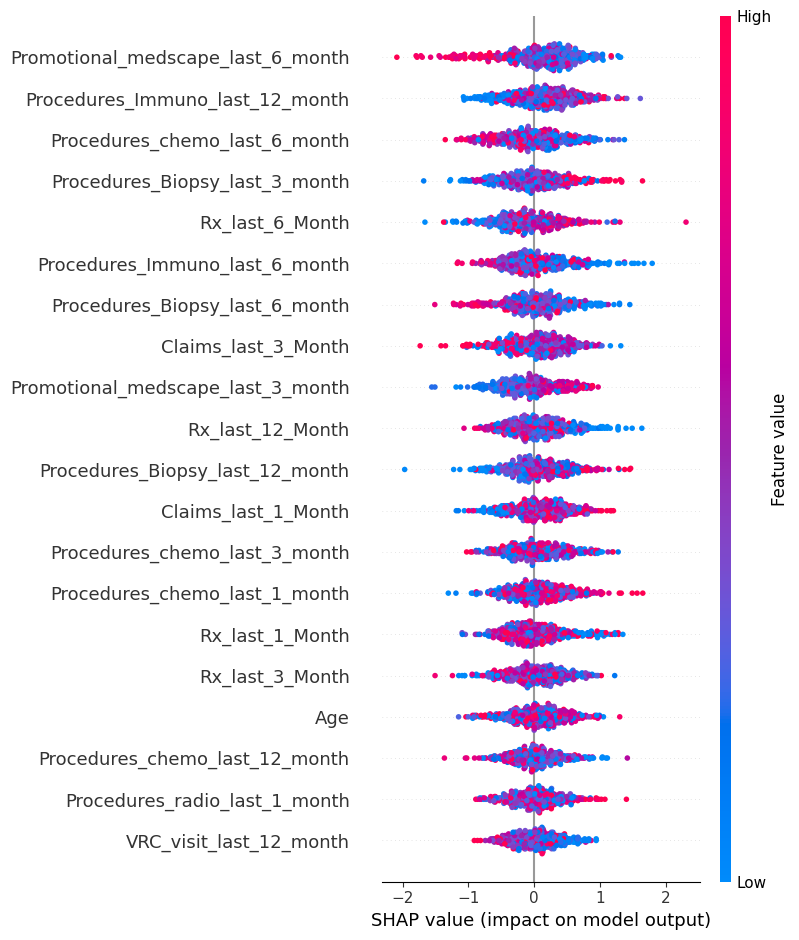

In [16]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

In [17]:
X_val.columns

Index(['Age', 'Number_of_Rx', 'Rx_last_1_Month', 'Rx_last_3_Month',
       'Rx_last_6_Month', 'Rx_last_12_Month', 'Claims_last_1_Month',
       'Claims_last_3_Month', 'Procedures_chemo_last_1_month',
       'Procedures_chemo_last_3_month', 'Procedures_chemo_last_6_month',
       'Procedures_chemo_last_12_month', 'Procedures_radio_last_1_month',
       'Procedures_Immuno_last_6_month', 'Procedures_Immuno_last_12_month',
       'Procedures_Biopsy_last_3_month', 'Procedures_Biopsy_last_6_month',
       'Procedures_Biopsy_last_12_month', 'Promotional_medscape_last_1_month',
       'Promotional_medscape_last_3_month',
       'Promotional_medscape_last_6_month', 'F2F_visit',
       'F2F_visit_last_1_month', 'F2F_visit_last_3_month',
       'VRC_visit_last_3_month', 'VRC_visit_last_6_month',
       'VRC_visit_last_12_month', 'HCO_Affiliation_Type_Contract',
       'HCO_Affiliation_Type_Referral'],
      dtype='object')

In [18]:
vals = np.abs(shap_values.values).mean(0)
feature_names = X_val.columns

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                 columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                              ascending=False, inplace=True)
feature_importance.head()

,col_name,feature_importance_vals
20,Promotional_medscape_last_6_month,0.434215
14,Procedures_Immuno_last_12_month,0.390510
10,Procedures_chemo_last_6_month,0.372747
15,Procedures_Biopsy_last_3_month,0.364584
4,Rx_last_6_Month,0.358828


In [19]:
def calculate_top_shap_features(df, id_col_list, model, n):
    # Initialize SHAP explainer
    explainer = shap.Explainer(model)
    
    # Calculate SHAP values for the entire DataFrame
    shap_values = explainer.shap_values(df.drop(id_col_list, axis=1))
    
    # Create a new DataFrame to store the top features for each row
    top_features_df = pd.DataFrame(index=df.index)
    
    # Iterate through rows and extract top n features
    for row_idx in range(len(df)):
        shap_values_row = shap_values[row_idx]
        
        # Get the absolute SHAP values
        abs_shap_values = abs(shap_values_row)
        
        # Get indices of top n features
        top_feature_indices = abs_shap_values.argsort()[-n:][::-1]
        
        # Get corresponding feature names
        top_feature_names = df.drop(id_col_list, axis=1).columns[top_feature_indices]
        
        # Add the id_col_list column values to the new DataFrame
        for col in id_col_list:
            top_features_df.loc[row_idx, col] = df.loc[row_idx, col]
        
        # Add the top feature names to the new DataFrame
        for i in range(n):
            top_features_df.loc[row_idx, f'REASON{i+1}'] = top_feature_names[i]
    
    return top_features_df


In [20]:
# Example usage
# Assuming you have a trained XGBoost model named 'model', a DataFrame named 'data',
# a list of columns not part of the model named 'id_col_list', and the number of features 'n'
df = df_inference.loc[df_inference['Prediction'] == 1.0].reset_index(drop=True)

id_col_list = ['NPI_ID', 'HCP_ID','Prediction']
top_features_df = calculate_top_shap_features(df, id_col_list, conversion_classifer, n=3)



is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


In [21]:
top_features_df

,NPI_ID,HCP_ID,Prediction,REASON1,REASON2,REASON3
0,5828135.0,HCP_4381,1.0,Procedures_chemo_last_6_month,Promotional_medscape_last_6_month,Procedures_Immuno_last_6_month
1,6776993.0,HCP_2235,1.0,Procedures_Biopsy_last_12_month,Promotional_medscape_last_6_month,Claims_last_3_Month
2,2711759.0,HCP_2472,1.0,Promotional_medscape_last_3_month,Rx_last_12_Month,Rx_last_1_Month
3,6139454.0,HCP_84,1.0,Procedures_Biopsy_last_12_month,Procedures_Biopsy_last_6_month,Procedures_Biopsy_last_3_month
4,3963312.0,HCP_4604,1.0,Age,Claims_last_1_Month,Claims_last_3_Month
...,...,...,...,...,...,...
114,8881262.0,HCP_1495,1.0,Procedures_chemo_last_12_month,Claims_last_3_Month,Promotional_medscape_last_3_month
115,4484787.0,HCP_4693,1.0,Procedures_Biopsy_last_3_month,Rx_last_12_Month,Procedures_Immuno_last_6_month
116,8030820.0,HCP_4061,1.0,Rx_last_3_Month,Promotional_medscape_last_6_month,Age
117,7213373.0,HCP_2243,1.0,Promotional_medscape_last_1_month,Rx_last_12_Month,VRC_visit_last_6_month


In [22]:
top_features_df['Prediction'].value_counts()

Prediction
1.0    119
Name: count, dtype: int64